In [1]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq)  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear(lstm_out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out

In [11]:
SEQ_LEN = 128
INPUT_SIZE = 100
#HIDDEN_SIZE = 32 - for more complex case of multi_dist=True
HIDDEN_SIZE = 8


# Our approach

In [4]:
base_model_cpd = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                      n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

cpd_model = models.CPD_model(model=base_model_cpd, T=32,
                             loss_type='CPD', experiment_type='synthetic_100D', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [5]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [6]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 7777

In [7]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 3.5 K 
1 | loss  | CPDLoss | 0     
----------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 1.001


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.325 >= min_delta = 0.01. New best score: 0.676


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.278 >= min_delta = 0.01. New best score: 0.399


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.201 >= min_delta = 0.01. New best score: 0.197


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.198 >= min_delta = 0.01. New best score: -0.001


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.184 >= min_delta = 0.01. New best score: -0.185


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.217 >= min_delta = 0.01. New best score: -0.401


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.240 >= min_delta = 0.01. New best score: -0.642


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.280 >= min_delta = 0.01. New best score: -0.922


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.249 >= min_delta = 0.01. New best score: -1.171


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.385 >= min_delta = 0.01. New best score: -1.556


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.453 >= min_delta = 0.01. New best score: -2.009


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.494 >= min_delta = 0.01. New best score: -2.503


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.703 >= min_delta = 0.01. New best score: -3.207


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.820 >= min_delta = 0.01. New best score: -4.027


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.136 >= min_delta = 0.01. New best score: -5.162


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.451 >= min_delta = 0.01. New best score: -6.613


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.593 >= min_delta = 0.01. New best score: -8.207


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.737 >= min_delta = 0.01. New best score: -9.943


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.951 >= min_delta = 0.01. New best score: -11.894


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.116 >= min_delta = 0.01. New best score: -14.010


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.284 >= min_delta = 0.01. New best score: -16.294


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.403 >= min_delta = 0.01. New best score: -18.697


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.563 >= min_delta = 0.01. New best score: -21.260


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.778 >= min_delta = 0.01. New best score: -24.038


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.958 >= min_delta = 0.01. New best score: -26.995


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.518 >= min_delta = 0.01. New best score: -30.514


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.251 >= min_delta = 0.01. New best score: -34.765


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.820 >= min_delta = 0.01. New best score: -38.585


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.452 >= min_delta = 0.01. New best score: -42.037


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.233 >= min_delta = 0.01. New best score: -45.270


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.050 >= min_delta = 0.01. New best score: -48.319


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.854 >= min_delta = 0.01. New best score: -51.173


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.668 >= min_delta = 0.01. New best score: -53.841


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.760 >= min_delta = 0.01. New best score: -56.601


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.356 >= min_delta = 0.01. New best score: -58.957


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.090 >= min_delta = 0.01. New best score: -61.048


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.340 >= min_delta = 0.01. New best score: -63.388


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.897 >= min_delta = 0.01. New best score: -65.285


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.901 >= min_delta = 0.01. New best score: -67.186


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.876 >= min_delta = 0.01. New best score: -69.062


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.368 >= min_delta = 0.01. New best score: -70.430


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.857 >= min_delta = 0.01. New best score: -72.287


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.449 >= min_delta = 0.01. New best score: -73.736


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.016 >= min_delta = 0.01. New best score: -75.752


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.532 >= min_delta = 0.01. New best score: -77.283


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.951 >= min_delta = 0.01. New best score: -78.235


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.525 >= min_delta = 0.01. New best score: -79.760


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.617 >= min_delta = 0.01. New best score: -80.377


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.237 >= min_delta = 0.01. New best score: -81.614
/home/eromanenkova/anaconda3/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


# BCE model

In [15]:
base_model_bce = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                      n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

bce_model = models.CPD_model(model=base_model_cpd, T=None,
                             loss_type='BCE', experiment_type='synthetic_100D', 
                             lr=0.001, batch_size=64)

In [16]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [17]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 3.5 K 
1 | loss  | BCELoss | 0     
----------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.091


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.080


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.065


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.055


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.055. Signaling Trainer to stop.


# Combined

In [18]:
base_model_comb = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                       n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='synthetic_100D', 
                                    lr=0.001, batch_size=64)

combined_model_2 = models.CPD_model(model=base_model_comb, T=32,
                                    loss_type='CPD', experiment_type='synthetic_100D', 
                                    lr=0.001, batch_size=64)

In [19]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer_1 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [20]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 3.5 K 
1 | loss  | BCELoss | 0     
----------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.704


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.094 >= min_delta = 0.01. New best score: 0.610


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.043 >= min_delta = 0.01. New best score: 0.567


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 0.545


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.526


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.027 >= min_delta = 0.01. New best score: 0.499


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.480


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: 0.456


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.026 >= min_delta = 0.01. New best score: 0.431


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.025 >= min_delta = 0.01. New best score: 0.406


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.391


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.021 >= min_delta = 0.01. New best score: 0.371


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.01. New best score: 0.353


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.027 >= min_delta = 0.01. New best score: 0.325


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.01. New best score: 0.313


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.302


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.283


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.266


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.250
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 3.5 K 
1 | loss  | CPDLoss | 0     
----------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.722 >= min_delta = 0.01. New best score: -2.472


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.069 >= min_delta = 0.01. New best score: -3.541


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.022 >= min_delta = 0.01. New best score: -4.564


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.993 >= min_delta = 0.01. New best score: -5.557


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.982 >= min_delta = 0.01. New best score: -6.539


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.035 >= min_delta = 0.01. New best score: -7.574


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.182 >= min_delta = 0.01. New best score: -8.756


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.256 >= min_delta = 0.01. New best score: -10.012


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.353 >= min_delta = 0.01. New best score: -11.365


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.461 >= min_delta = 0.01. New best score: -12.825


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.573 >= min_delta = 0.01. New best score: -14.399


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.694 >= min_delta = 0.01. New best score: -16.093


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.810 >= min_delta = 0.01. New best score: -17.903


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.863 >= min_delta = 0.01. New best score: -19.766


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.006 >= min_delta = 0.01. New best score: -21.772


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.096 >= min_delta = 0.01. New best score: -23.869


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.167 >= min_delta = 0.01. New best score: -26.036


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.105 >= min_delta = 0.01. New best score: -28.141


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.375 >= min_delta = 0.01. New best score: -30.516


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.237 >= min_delta = 0.01. New best score: -32.753


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.296 >= min_delta = 0.01. New best score: -35.049


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.396 >= min_delta = 0.01. New best score: -37.445


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.232 >= min_delta = 0.01. New best score: -39.677


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.296 >= min_delta = 0.01. New best score: -41.973


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.135 >= min_delta = 0.01. New best score: -44.109


# Calculate metrics

## Detection curve and Area under detection curve

In [21]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [22]:
cpd_model.to('cuda')
(_, _, delay_list, fp_delay_list) = metrics.get_pareto_metrics_for_threshold(cpd_model, 
                                                                             cpd_model.test_dataloader(), 
                                                                             threshold_list,
                                                                             verbose=False)

In [23]:
bce_model.to('cuda')
(_, _, delay_list_bce, fp_delay_list_bce) = metrics.get_pareto_metrics_for_threshold(bce_model, 
                                                                                     cpd_model.test_dataloader(), 
                                                                                     threshold_list,
                                                                                     verbose=False)

In [24]:
combined_model_2.to('cuda')
(_, _, delay_list_comb, fp_delay_list_comb) = metrics.get_pareto_metrics_for_threshold(combined_model_2, 
                                                                                       cpd_model.test_dataloader(), 
                                                                                       threshold_list,
                                                                                       verbose=False)

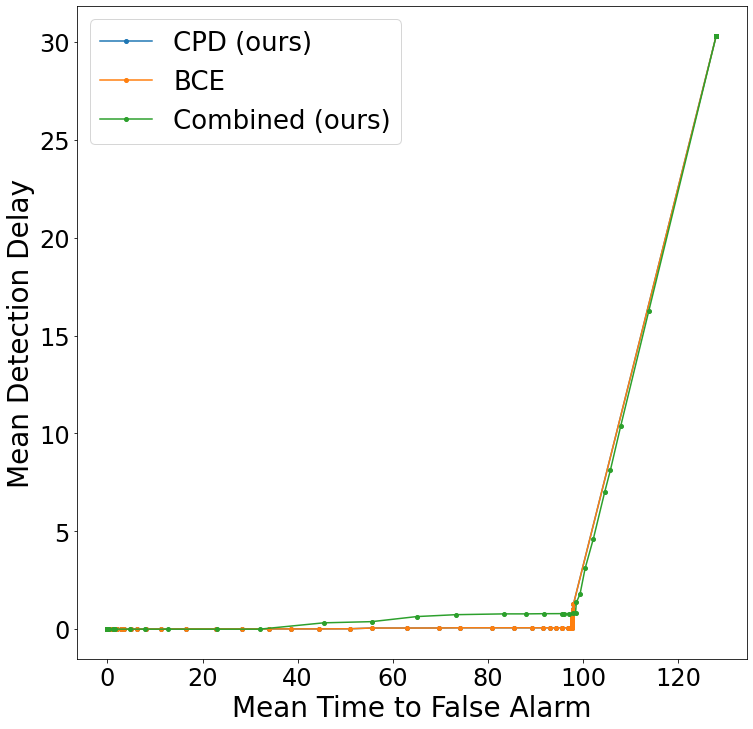

In [25]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list, delay_list, '-o', markersize=4, label='CPD (ours)')
plt.plot(fp_delay_list_bce, delay_list_bce, '-o', markersize=4, label='BCE')
plt.plot(fp_delay_list_comb, delay_list_comb, '-o', markersize=4, label='Combined (ours)')

plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);

In [26]:
print('CPD AUC:', metrics.area_under_graph(delay_list, fp_delay_list))
print('BCE AUC:', metrics.area_under_graph(delay_list_bce, fp_delay_list_bce))
print('COMB AUC:', metrics.area_under_graph(delay_list_comb, fp_delay_list_comb))

CPD AUC: 477.3567333333334
BCE AUC: 477.3567333333334
COMB AUC: 497.76542777777775


## Cover and F1-score

In [27]:
threshold_list = []
threshold_list = [0.001, 0.005] + list(np.round(np.arange(0.1, 1, 0.1), 2))

In [28]:
cpd_cover_dict = {}
bce_cover_dict = {}
comb_cover_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_cover_dict[th] = metrics.cover(cpd_model, cpd_model.val_dataloader(), th)
    bce_cover_dict[th] = metrics.cover(bce_model, cpd_model.val_dataloader(), th)    
    comb_cover_dict[th] = metrics.cover(combined_model_2, cpd_model.val_dataloader(), th)        

In [29]:
metrics_dict = cpd_cover_dict
print('BCE max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_cover_dict
print('CPD max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_cover_dict
print('COMB max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

BCE max COVER 0.9988: for threshold 0.5:
CPD max COVER 0.9988: for threshold 0.5:
COMB max COVER 0.9921: for threshold 0.2:


In [30]:
cpd_f1_dict = {}
bce_f1_dict = {}
comb_f1_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_dict[th] = metrics.F1_score(cpd_model, cpd_model.val_dataloader(), th)
    bce_f1_dict[th] = metrics.F1_score(bce_model, cpd_model.val_dataloader(), th)    
    comb_f1_dict[th] = metrics.F1_score(combined_model_2, cpd_model.val_dataloader(), th)        

In [31]:
metrics_dict = cpd_f1_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 0.9966: for threshold 0.5:
BCE max F1 0.9966: for threshold 0.5:
COMB max F1 0.9718: for threshold 0.2:


In [32]:
# margin = 10
cpd_f1_lib_dict = {}
bce_f1_lib_dict = {}
comb_f1_lib_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_lib_dict[th] = metrics.F1_score_ruptures(cpd_model, cpd_model.val_dataloader(), th)
    bce_f1_lib_dict[th] = metrics.F1_score_ruptures(bce_model, cpd_model.val_dataloader(), th)    
    comb_f1_lib_dict[th] = metrics.F1_score_ruptures(combined_model_2, cpd_model.val_dataloader(), th)        

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
metrics_dict = cpd_f1_lib_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_lib_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_lib_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 1.0: for threshold 0.4:
BCE max F1 1.0: for threshold 0.4:
COMB max F1 0.9929: for threshold 0.2:


In [34]:
# margin = 5
cpd_f1_lib_dict = {}
bce_f1_lib_dict = {}
comb_f1_lib_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_lib_dict[th] = metrics.F1_score_ruptures(cpd_model, cpd_model.val_dataloader(), th, margin=5)
    bce_f1_lib_dict[th] = metrics.F1_score_ruptures(bce_model, cpd_model.val_dataloader(), th, margin=5)    
    comb_f1_lib_dict[th] = metrics.F1_score_ruptures(combined_model_2, cpd_model.val_dataloader(), th, margin=5)        

In [35]:
metrics_dict = cpd_f1_lib_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_lib_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_lib_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 0.9931: for threshold 0.4:
BCE max F1 0.9931: for threshold 0.4:
COMB max F1 0.9857: for threshold 0.2:
